# 0. Install and Import Dependencies

In [1]:
!pip install mediapipe opencv-python pandas scikit-learn simpleaudio

In [2]:
import mediapipe as mp # Import mediapipe
import cv2 # Import opencv

In [3]:
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions

# 1. Full Body Detections

In [4]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [5]:
results.pose_landmarks.landmark

[x: 0.5359359383583069
y: 0.5536344647407532
z: -1.5596784353256226
visibility: 0.9995839595794678
, x: 0.5685292482376099
y: 0.4606020748615265
z: -1.5226998329162598
visibility: 0.9994421601295471
, x: 0.5917159914970398
y: 0.46100860834121704
z: -1.5225073099136353
visibility: 0.9991992712020874
, x: 0.6114007830619812
y: 0.46209895610809326
z: -1.5231677293777466
visibility: 0.9993801712989807
, x: 0.5083593130111694
y: 0.45661163330078125
z: -1.5141009092330933
visibility: 0.9994769096374512
, x: 0.487255334854126
y: 0.45498746633529663
z: -1.5147511959075928
visibility: 0.9992650151252747
, x: 0.4689108729362488
y: 0.4535784125328064
z: -1.5158202648162842
visibility: 0.9994249939918518
, x: 0.640903651714325
y: 0.4969520568847656
z: -1.0819053649902344
visibility: 0.999241828918457
, x: 0.44154077768325806
y: 0.4930735230445862
z: -1.0350861549377441
visibility: 0.9991359114646912
, x: 0.5756820440292358
y: 0.6554713845252991
z: -1.374730110168457
visibility: 0.9995612502098083


# 2. Data Collection
<!--<img src="https://i.imgur.com/8bForKY.png">-->
<!--<img src="https://i.imgur.com/AzKNp7A.png">-->

## 2.1 Capture Landmarks & Export to CSV

In [6]:
import csv
import os
import numpy as np

In [7]:
num_coords = len(results.pose_landmarks.landmark)
num_coords

33

In [8]:
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [9]:
landmarks

['class',
 'x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21',
 'x22',
 'y22',
 'z22',
 'v22',
 'x23',
 'y23',
 'z23',
 'v23',
 'x24',
 'y24',
 'z24',
 'v24',
 'x25',
 'y25',
 'z25',
 'v25',
 'x26',
 'y26',
 'z26',
 'v26',
 'x27',
 'y27',
 'z27',
 'v27',
 'x28',
 'y28',
 'z28',
 'v28',
 'x29',
 'y29',
 'z29',
 'v29',
 'x30',
 'y30',
 'z30',
 'v30',
 'x31',
 'y31',
 'z31',
 'v31',
 'x32',
 'y32',
 'z32',
 'v32',
 '

In [11]:
with open('coords.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [12]:
class_name = "Slant"

In [14]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Append class name 
            row.insert(0, class_name)
            
            # Export to CSV
            with open('coords.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

## 2.2 Data Visualization

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

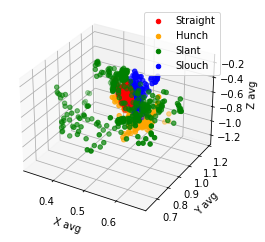

In [4]:
df = pd.read_csv('coords - coords.csv')

ax = plt.axes(projection='3d')

postures = ['Straight', 'Hunch', 'Slant', 'Slouch']
colors = ['red', 'orange', 'green', 'blue']

for i in range(4):
    x = np.array(df[df['class'] == postures[i]]['accX'])
    y = np.array(df[df['class'] == postures[i]]['accY'])
    z = np.array(df[df['class'] == postures[i]]['accZ'])
    ax.scatter(x , y , z, label = postures[i], c = colors[i])

ax.set_xlabel('X avg')
ax.set_ylabel('Y avg')
ax.set_zlabel('Z avg')
plt.legend()
plt.show()

<ipython-input-5-cea24618da6f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Straight', 'Hunch', 'Slant', 'Slouch'],rotation=45, fontsize=12)


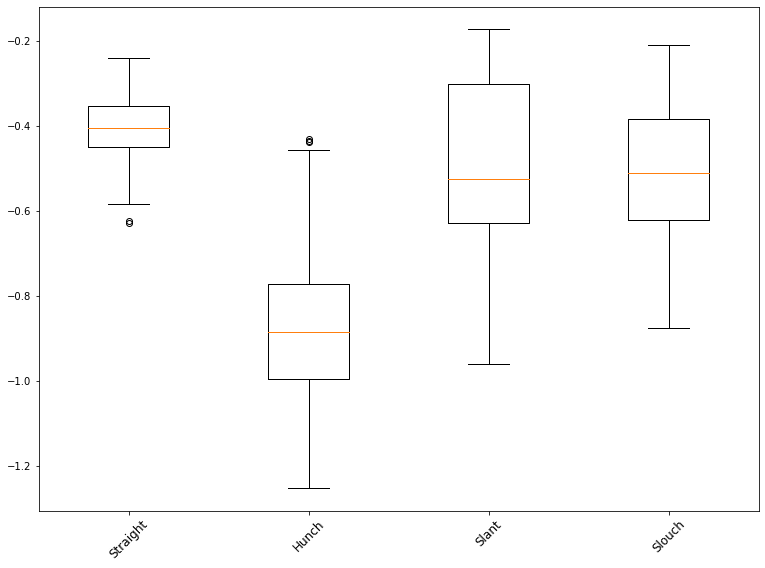

In [5]:
data_1 = np.array(df[df['class'] == 'Straight']['accZ'])
data_2 = np.array(df[df['class'] == 'Hunch']['accZ'])
data_3 = np.array(df[df['class'] == 'Slant']['accZ'])
data_4 = np.array(df[df['class'] == 'Slouch']['accZ'])
data = [data_1, data_2, data_3, data_4]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(['Straight', 'Hunch', 'Slant', 'Slouch'],rotation=45, fontsize=12)

# Creating plot
bp = ax.boxplot(data)

# show plot
plt.show()

# 3. Train Pose Detection Model Using Scikit Learn

## 3.1 Read in Collected Data and Process

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('coords.csv')

In [72]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,Straight,0.496088,0.438532,-0.724490,0.999802,0.523241,0.368238,-0.700366,0.999347,0.540764,...,0.222074,0.000263,0.576226,3.550432,0.270084,0.000224,0.383926,3.528836,-0.194561,0.000301
1,Straight,0.495909,0.438689,-0.829146,0.999814,0.522136,0.368452,-0.797048,0.999387,0.540058,...,0.300088,0.000265,0.576195,3.464079,0.260180,0.000227,0.385136,3.454820,-0.120146,0.000313
2,Straight,0.494261,0.438687,-0.670267,0.999816,0.519403,0.368405,-0.642866,0.999394,0.537848,...,0.300191,0.000256,0.575565,3.421683,0.166816,0.000221,0.387164,3.413529,-0.115819,0.000311
3,Straight,0.493109,0.439192,-0.796572,0.999821,0.517358,0.368481,-0.774666,0.999415,0.536282,...,0.375779,0.000253,0.574630,3.389012,0.199416,0.000217,0.387445,3.373122,-0.038024,0.000316
4,Straight,0.493332,0.438891,-0.781873,0.999825,0.517396,0.368142,-0.765544,0.999433,0.536295,...,0.189042,0.000255,0.579885,3.388576,0.212847,0.000224,0.390583,3.375658,-0.221692,0.000326


In [73]:
df.tail()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
1032,Hunch,0.462248,0.723359,-1.728784,0.999522,0.486144,0.600677,-1.721841,0.998620,0.505044,...,0.316757,0.001089,0.689218,3.668262,0.342774,0.000620,0.474707,3.685948,-0.178642,0.001270
1033,Hunch,0.477602,0.723921,-1.809313,0.999523,0.500840,0.600333,-1.793244,0.998639,0.519787,...,0.331738,0.001050,0.692503,3.692782,0.370988,0.000628,0.476988,3.710994,-0.176962,0.001247
1034,Hunch,0.574671,0.719513,-1.716270,0.999522,0.588139,0.599292,-1.625682,0.998684,0.604819,...,0.556382,0.001007,0.686580,3.741038,0.448276,0.000641,0.473043,3.755184,0.033278,0.001193
1035,Hunch,0.586059,0.719329,-1.718255,0.999488,0.605132,0.598557,-1.679709,0.998642,0.622269,...,0.746271,0.000958,0.682907,3.780121,0.499104,0.000629,0.469840,3.789786,0.229775,0.001127
1036,Hunch,0.588968,0.717275,-1.643196,0.999516,0.608930,0.598478,-1.604371,0.998717,0.626121,...,0.703163,0.000914,0.672164,3.774515,0.440676,0.000618,0.456739,3.782834,0.201340,0.001072


In [3]:
df[df['class']=='Slant']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
666,Slant,0.450296,0.513186,-0.583452,0.999696,0.478280,0.434891,-0.567283,0.999142,0.497467,...,0.258327,0.000213,0.527707,3.384633,0.295576,0.000177,0.337501,3.357381,-0.118023,0.000307
667,Slant,0.446974,0.514281,-0.732445,0.999714,0.474716,0.435435,-0.708226,0.999196,0.493235,...,0.388368,0.000228,0.547733,3.369633,0.263169,0.000189,0.365196,3.356510,-0.011051,0.000322
668,Slant,0.443205,0.514390,-0.764071,0.999734,0.470981,0.435446,-0.738776,0.999256,0.489420,...,0.408009,0.000254,0.561873,3.369128,0.262735,0.000204,0.373838,3.356823,0.008227,0.000340
669,Slant,0.441017,0.514391,-0.747410,0.999749,0.468999,0.435491,-0.723412,0.999297,0.487516,...,0.426274,0.000278,0.564674,3.366975,0.265064,0.000233,0.375383,3.357022,0.023844,0.000386
670,Slant,0.440026,0.515336,-0.853718,0.999767,0.468213,0.436055,-0.833327,0.999345,0.486995,...,0.577236,0.000280,0.571701,3.357500,0.276363,0.000241,0.383086,3.351164,0.173337,0.000393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,Slant,0.490164,0.458320,-0.531385,0.999862,0.522174,0.392452,-0.514149,0.999621,0.540938,...,0.385044,0.000201,0.550263,3.469067,0.172140,0.000215,0.368110,3.439057,-0.038280,0.000352
1097,Slant,0.482182,0.455939,-0.538928,0.999858,0.512213,0.387932,-0.517416,0.999598,0.530774,...,0.397172,0.000196,0.550357,3.457337,0.171207,0.000209,0.368697,3.431715,-0.013633,0.000342
1098,Slant,0.477768,0.455922,-0.643953,0.999856,0.507707,0.386840,-0.627853,0.999581,0.526180,...,0.514122,0.000191,0.550323,3.456358,0.171760,0.000201,0.368538,3.431698,0.089334,0.000331
1099,Slant,0.476717,0.456025,-0.578728,0.999858,0.505961,0.386725,-0.558410,0.999578,0.524561,...,0.479116,0.000183,0.552565,3.456993,0.164503,0.000197,0.373598,3.437217,0.044162,0.000321


In [99]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [101]:
y_test

868       Slant
160    Straight
205    Straight
395       Hunch
519      Slouch
         ...   
994       Hunch
100    Straight
335       Hunch
811       Slant
709       Slant
Name: class, Length: 312, dtype: object

## 3.2 Train Machine Learning Classification Model

In [102]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [103]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [104]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

/Users/xinying/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [106]:
fit_models['rf'].predict(X_test)

array(['Slant', 'Straight', 'Straight', 'Hunch', 'Slouch', 'Hunch',
       'Slant', 'Hunch', 'Straight', 'Slant', 'Slouch', 'Hunch', 'Slant',
       'Straight', 'Straight', 'Straight', 'Hunch', 'Hunch', 'Slouch',
       'Hunch', 'Straight', 'Straight', 'Hunch', 'Straight', 'Hunch',
       'Slouch', 'Straight', 'Slouch', 'Straight', 'Slant', 'Hunch',
       'Hunch', 'Slouch', 'Slant', 'Straight', 'Hunch', 'Hunch', 'Slouch',
       'Slant', 'Hunch', 'Straight', 'Slouch', 'Slant', 'Straight',
       'Straight', 'Straight', 'Slouch', 'Straight', 'Straight', 'Hunch',
       'Slant', 'Slant', 'Hunch', 'Straight', 'Slant', 'Hunch', 'Slant',
       'Slouch', 'Slouch', 'Slouch', 'Slouch', 'Slant', 'Slant', 'Hunch',
       'Slant', 'Straight', 'Straight', 'Hunch', 'Hunch', 'Slant',
       'Slouch', 'Hunch', 'Slant', 'Straight', 'Hunch', 'Hunch',
       'Straight', 'Slouch', 'Straight', 'Straight', 'Slant', 'Slant',
       'Hunch', 'Hunch', 'Hunch', 'Slouch', 'Hunch', 'Straight',
       'Straight

## 3.3 Evaluate and Serialize Model 

In [41]:
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle

In [108]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 1.0
rc 1.0
rf 1.0
gb 1.0


In [109]:
fit_models['rf'].predict(X_test)

array(['Slant', 'Straight', 'Straight', 'Hunch', 'Slouch', 'Hunch',
       'Slant', 'Hunch', 'Straight', 'Slant', 'Slouch', 'Hunch', 'Slant',
       'Straight', 'Straight', 'Straight', 'Hunch', 'Hunch', 'Slouch',
       'Hunch', 'Straight', 'Straight', 'Hunch', 'Straight', 'Hunch',
       'Slouch', 'Straight', 'Slouch', 'Straight', 'Slant', 'Hunch',
       'Hunch', 'Slouch', 'Slant', 'Straight', 'Hunch', 'Hunch', 'Slouch',
       'Slant', 'Hunch', 'Straight', 'Slouch', 'Slant', 'Straight',
       'Straight', 'Straight', 'Slouch', 'Straight', 'Straight', 'Hunch',
       'Slant', 'Slant', 'Hunch', 'Straight', 'Slant', 'Hunch', 'Slant',
       'Slouch', 'Slouch', 'Slouch', 'Slouch', 'Slant', 'Slant', 'Hunch',
       'Slant', 'Straight', 'Straight', 'Hunch', 'Hunch', 'Slant',
       'Slouch', 'Hunch', 'Slant', 'Straight', 'Hunch', 'Hunch',
       'Straight', 'Slouch', 'Straight', 'Straight', 'Slant', 'Slant',
       'Hunch', 'Hunch', 'Hunch', 'Slouch', 'Hunch', 'Straight',
       'Straight

In [110]:
y_test

868       Slant
160    Straight
205    Straight
395       Hunch
519      Slouch
         ...   
994       Hunch
100    Straight
335       Hunch
811       Slant
709       Slant
Name: class, Length: 312, dtype: object

In [114]:
with open('body_language_gb.pkl', 'wb') as f:
    pickle.dump(fit_models['gb'], f)

# 4. Make Detections with Model

In [42]:
with open('body_language_lr.pkl', 'rb') as f:
    model = pickle.load(f)

In [43]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [44]:
import time
import simpleaudio

In [45]:
cap = cv2.VideoCapture(0)
last_straight_time = time.time()

# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            

            # Make Detections
            X = pd.DataFrame([row])
            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]
#             print(body_language_class, body_language_prob)
            
            # Get status box
            cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            
            # Alarm for Bad Poses
            if body_language_class.split(' ')[0] == 'Straight':
                last_straight_time = time.time()
                
            else:
                current_time = time.time()
                
                if current_time - last_straight_time > 5:
                    wave_obj = simpleaudio.WaveObject.from_wave_file("error.wav")
                    play_obj = wave_obj.play()
                    play_obj.wait_done()
            
        except:
            pass
        
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# 5. Sources

In [ ]:
# Code: https://github.com/nicknochnack/Body-Language-Decoder
# Audio: BEEPy